In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('breast_cancer_data_cleaned.csv')

In [3]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 31)

In [5]:
data.shape

(569, 31)

In [6]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


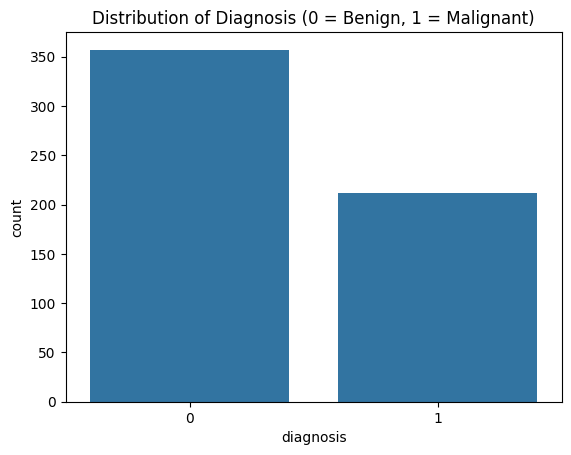

In [9]:
# Step 1: EDA
# Visualize the class distribution
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()

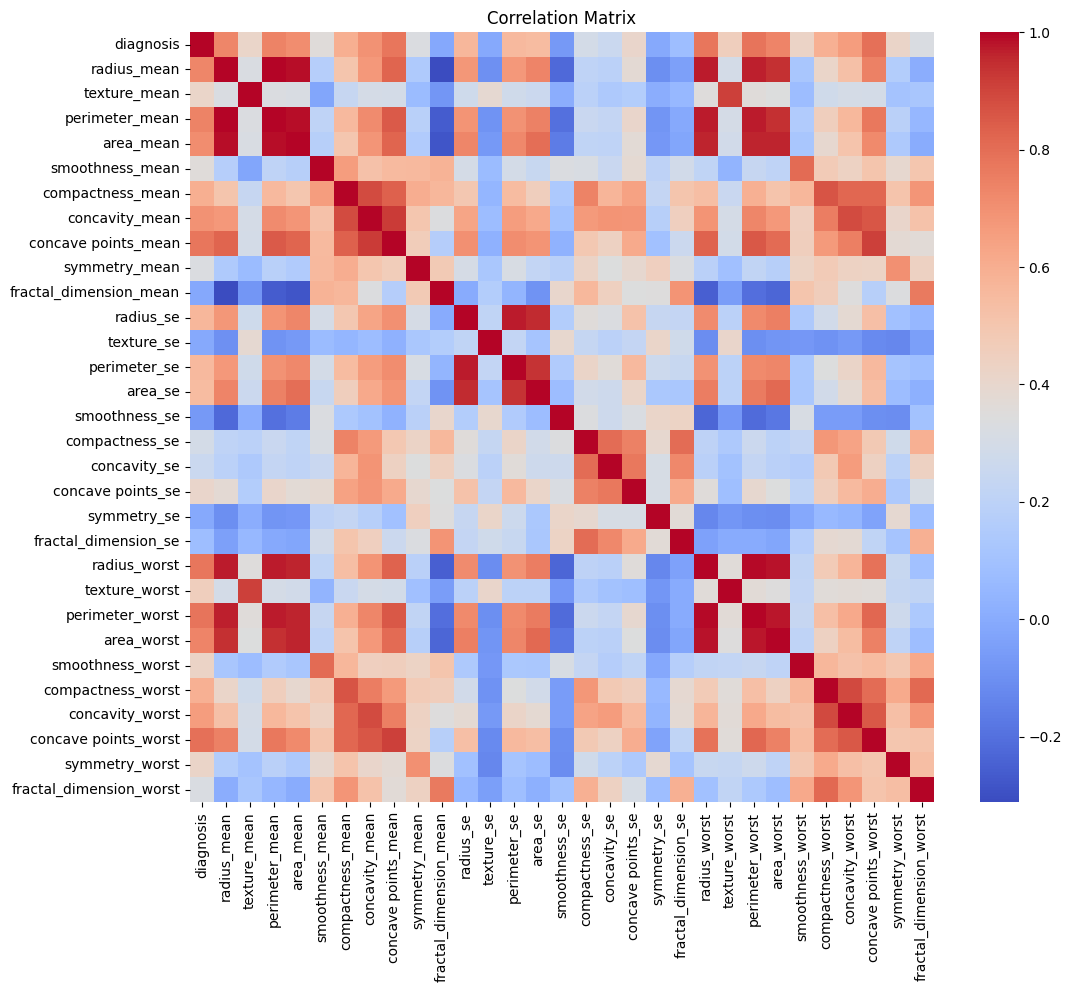

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Step 2: Data Preprocessing
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [12]:
from imblearn.over_sampling import SMOTE

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [13]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log

In [14]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize Logistic Regression with class weights
log_reg = LogisticRegression(class_weight=class_weights_dict, solver='liblinear', max_iter=200)

# Perform Grid Search for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10]}  # Regularization parameter
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Train the model on resampled data
grid_search.fit(X_resampled, y_resampled)

# Retrieve the best model
best_model = grid_search.best_estimator_


In [15]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluation Metrics:
Accuracy: 0.6754
Precision: 0.5581
Recall: 0.5714
F1-Score: 0.5647
Confusion Matrix:
[[53 19]
 [18 24]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


knn

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN
knn = KNeighborsClassifier()

# Hyperparameter tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}  # Tune the number of neighbors
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='f1', n_jobs=-1)

# Train KNN using the resampled dataset
grid_search_knn.fit(X_resampled, y_resampled)

# Best KNN model
best_knn = grid_search_knn.best_estimator_

# Predictions and evaluation
y_pred_knn = best_knn.predict(X_test)

print("KNN Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Evaluation Metrics:
Accuracy: 0.6316
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[72  0]
 [42  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


rf

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

# Train Random Forest using the resampled dataset
grid_search_rf.fit(X_resampled, y_resampled)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Predictions and evaluation
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Evaluation Metrics:
Accuracy: 0.6579
Precision: 1.0000
Recall: 0.0714
F1-Score: 0.1333
Confusion Matrix:
[[72  0]
 [39  3]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


svm


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize SVM
svc = SVC(class_weight='balanced', probability=True, random_state=42)

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid_svm, cv=5, scoring='f1', n_jobs=-1)

# Train SVM using the resampled dataset
grid_search_svm.fit(X_resampled, y_resampled)

# Best SVM model
best_svm = grid_search_svm.best_estimator_

# Predictions and evaluation
y_pred_svm = best_svm.predict(X_test)

print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Evaluation Metrics:
Accuracy: 0.7544
Precision: 0.7500
Recall: 0.5000
F1-Score: 0.6000
Confusion Matrix:
[[65  7]
 [21 21]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


plotting curves

In [19]:
# Common imports
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [20]:
# Function to plot the ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


log

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


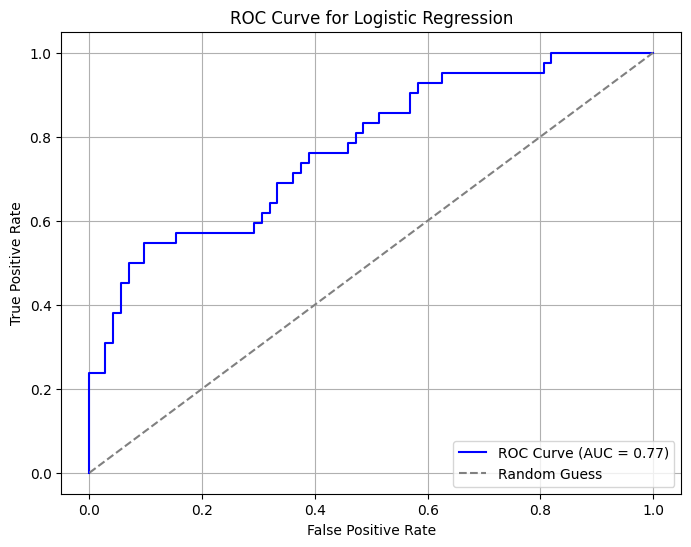

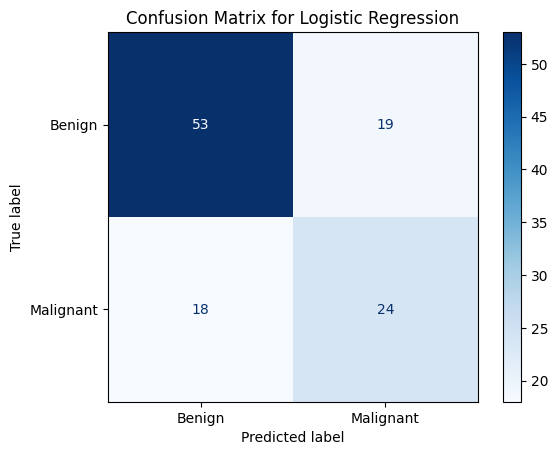

In [21]:
# Logistic Regression Predictions
y_pred_proba_lr = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plot_roc_curve(y_test, y_pred_proba_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")


knn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


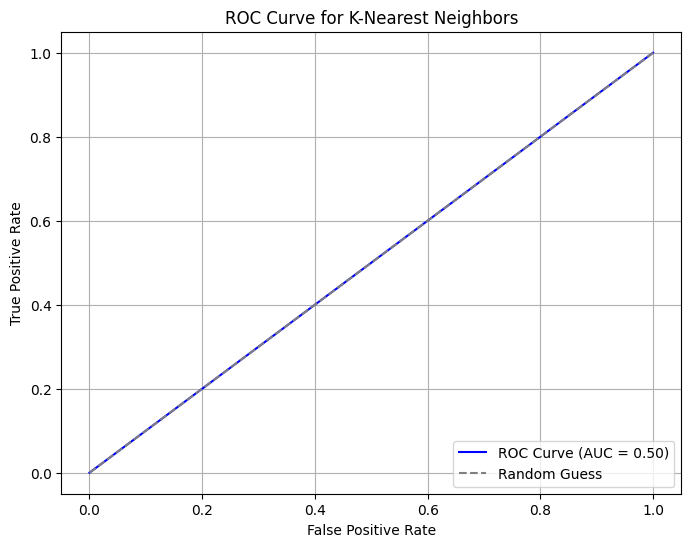

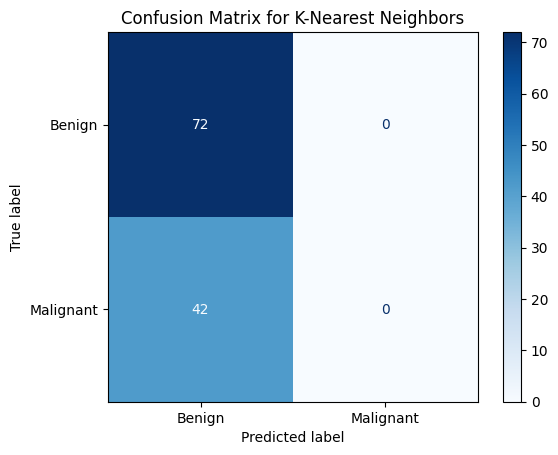

In [22]:
# KNN Predictions
y_pred_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plot_roc_curve(y_test, y_pred_proba_knn, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")


rf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


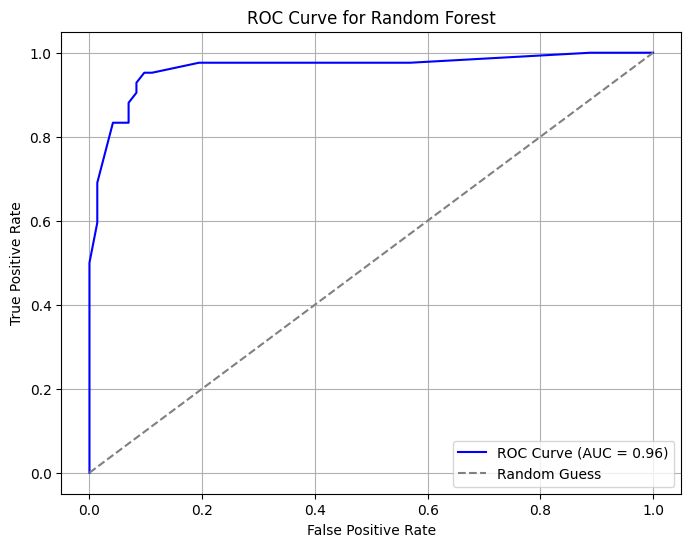

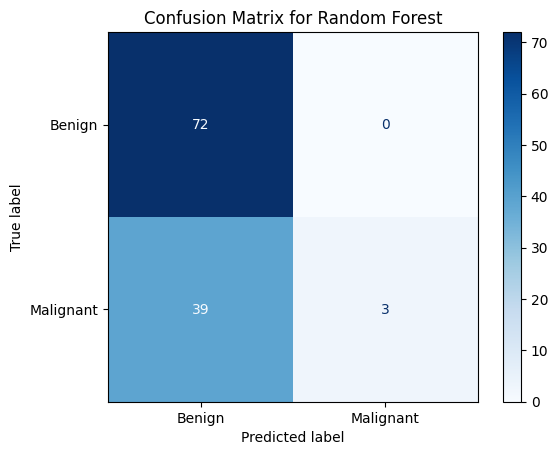

In [23]:
# Random Forest Predictions
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


svm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


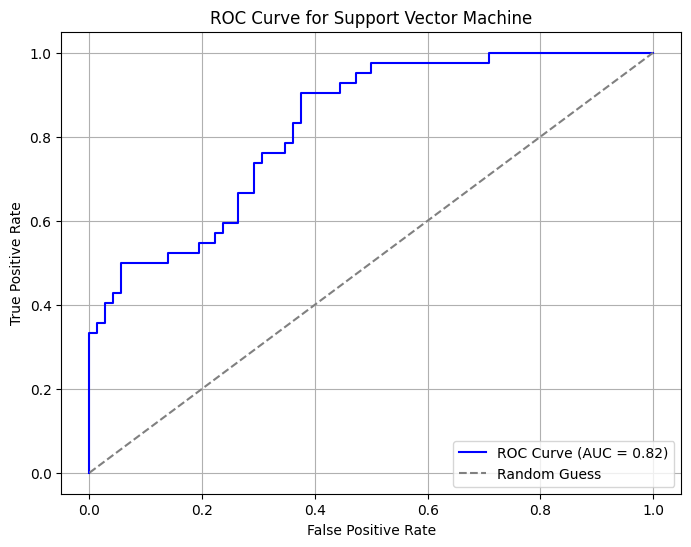

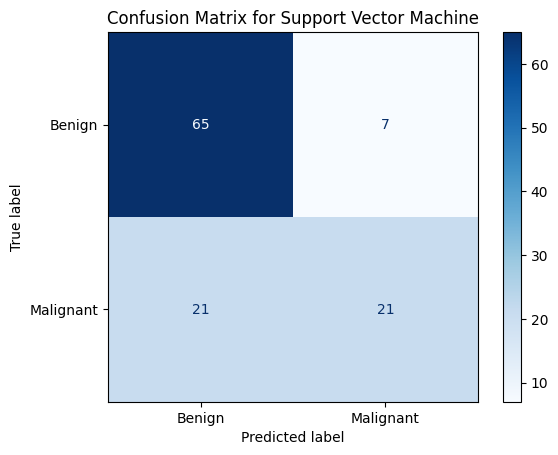

In [24]:
# SVM Predictions
y_pred_proba_svm = best_svm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plot_roc_curve(y_test, y_pred_proba_svm, "Support Vector Machine")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")


Plotting a Histogram of Accuracies

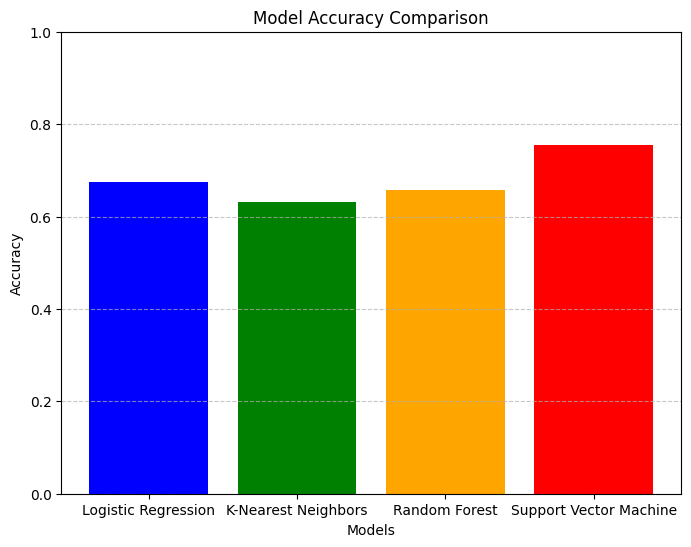

In [25]:
import numpy as np

# Store accuracy scores for each model
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "K-Nearest Neighbors": accuracy_score(y_test, y_pred_knn),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Support Vector Machine": accuracy_score(y_test, y_pred_svm),
}

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Comparing ROC Curves on a Single Graph

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature 

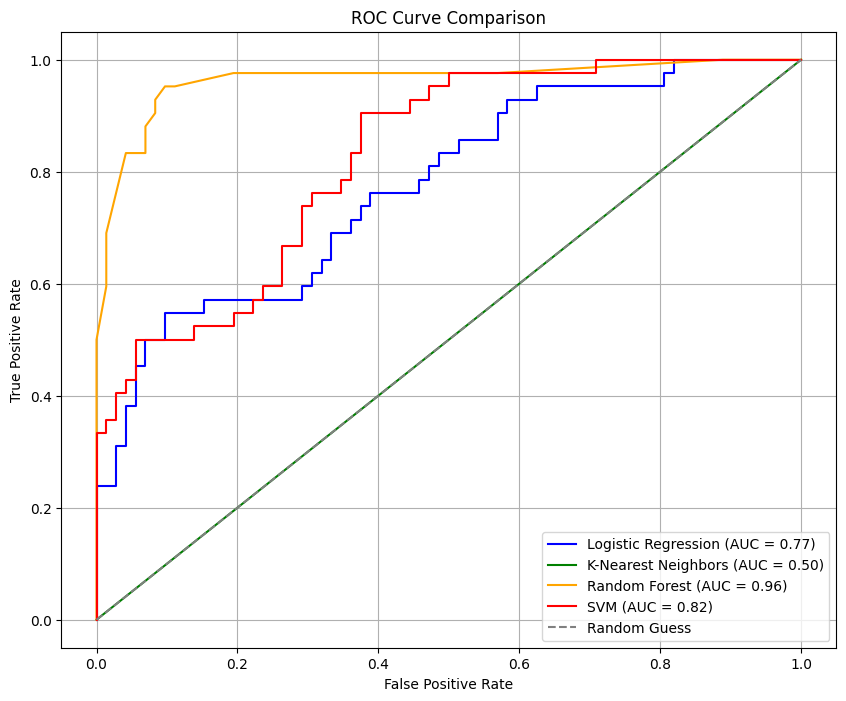

In [26]:
# Generate ROC Curve data for all models
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.predict_proba(X_test)[:, 1])

# Calculate AUC for each model
auc_lr = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
auc_knn = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
auc_svm = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='orange')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='gray')

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Code to Find the Best Model

In [27]:
# Step 1: Compare accuracy scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "K-Nearest Neighbors": accuracy_score(y_test, y_pred_knn),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Support Vector Machine": accuracy_score(y_test, y_pred_svm),
}

# Step 2: Compare AUC scores
auc_scores = {
    "Logistic Regression": roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]),
    "K-Nearest Neighbors": roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]),
    "Random Forest": roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]),
    "Support Vector Machine": roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1]),
}

# Step 3: Find the best model based on accuracy and AUC
best_accuracy_model = max(accuracy_scores, key=accuracy_scores.get)
best_auc_model = max(auc_scores, key=auc_scores.get)

# Step 4: Print the results
print("Best Model Based on Accuracy:")
print(f"{best_accuracy_model} with Accuracy: {accuracy_scores[best_accuracy_model]:.4f}")
print("\nBest Model Based on AUC:")
print(f"{best_auc_model} with AUC: {auc_scores[best_auc_model]:.4f}")

# Step 5: Find the overall best model
if best_accuracy_model == best_auc_model:
    print("\nThe best model is the same based on both Accuracy and AUC:", best_accuracy_model)
else:
    print("\nThe best model based on Accuracy is:", best_accuracy_model)
    print("The best model based on AUC is:", best_auc_model)


Best Model Based on Accuracy:
Support Vector Machine with Accuracy: 0.7544

Best Model Based on AUC:
Random Forest with AUC: 0.9638

The best model based on Accuracy is: Support Vector Machine
The best model based on AUC is: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Save the Model

In [28]:
import pickle

# Save the trained model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)  # 'best_svm' is your trained model


Load the Model

In [31]:
# Load the saved model from the file
with open('svm_model.pkl', 'rb') as f:
    loaded_svm_model = pickle.load(f)
print("Model loaded successfully")



Model loaded successfully


building a predicted model

In [35]:
import pickle
import numpy as np
from google.colab import files

# Step 1: Upload the model file
uploaded = files.upload()

# Step 2: Load the SVM model from the .pkl file
with open('svm_model.pkl', 'rb') as f:
    loaded_svm_model = pickle.load(f)

# Step 3: Define your input data (make sure it has the same structure as the training data)
input_data = (18.61,20.25,122.1,1094.0,0.0944,0.1066,0.149,0.07731,0.1697,0.05699,0.8529,1.849,5.632,93.54,0.01075,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403.0,0.1338,0.2117,0.3446,0.149,0.2341,0.07421
)

# Step 4: Convert the input data into a NumPy array and reshape for prediction
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Step 5: If you used any preprocessing (like scaling), apply it here:
# Example: if you used StandardScaler during training, you must scale the input data the same way:
# input_data_scaled = scaler.transform(input_data_reshaped)

# Step 6: Make prediction using the loaded model
prediction = loaded_svm_model.predict(input_data_reshaped)

# Step 7: Output the prediction result
if prediction[0] == 1:
    print("The Breast Cancer is Malignant")
else:
    print("The Breast Cancer is Benign")


Saving svm_model (3).pkl to svm_model (3) (3).pkl
The Breast Cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
